# Clustering 

### Name: Adiel Delgado Silva

#### Import Libraries

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.cluster import KMeans


#### Read The Dataset

In [48]:
df = pd.read_csv("Live.csv")

In [49]:
df.head()

,Unnamed: 0,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,year,month,day,hour,day_of_week,total_reactions,engagement
0,0,246675545449582_1649696485147474,video,2018-04-22 06:00:00,529,512,262,432,92,3,1,1,0,2018,4,22,6,6,529,1303
1,1,246675545449582_1649426988507757,photo,2018-04-21 22:45:00,150,0,0,150,0,0,0,0,0,2018,4,21,22,5,150,150
2,2,246675545449582_1648730588577397,video,2018-04-21 06:17:00,227,236,57,204,21,1,1,0,0,2018,4,21,6,5,227,520
3,3,246675545449582_1648576705259452,photo,2018-04-21 02:29:00,111,0,0,111,0,0,0,0,0,2018,4,21,2,5,111,111
4,4,246675545449582_1645700502213739,photo,2018-04-18 03:22:00,213,0,0,204,9,0,0,0,0,2018,4,18,3,2,213,213


In [50]:
df.isnull().sum()

Unnamed: 0          0
status_id           0
status_type         0
status_published    0
num_reactions       0
num_comments        0
num_shares          0
num_likes           0
num_loves           0
num_wows            0
num_hahas           0
num_sads            0
num_angrys          0
year                0
month               0
day                 0
hour                0
day_of_week         0
total_reactions     0
engagement          0
dtype: int64

<Axes: >

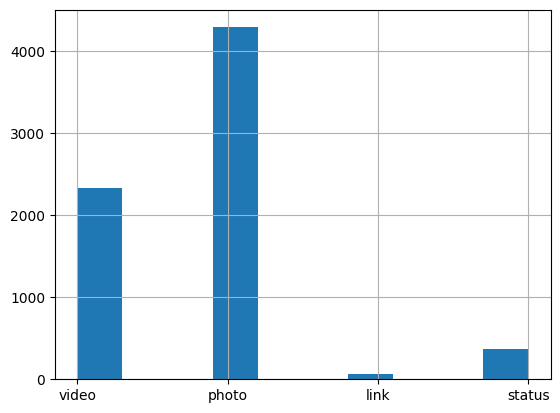

In [51]:
df["status_type"].hist()

<Axes: xlabel='num_reactions', ylabel='Count'>

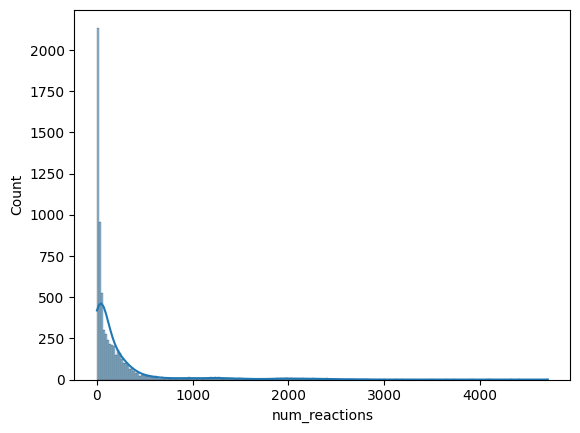

In [52]:
sns.histplot(x="num_reactions", data=df, kde=True)

<Axes: xlabel='num_comments', ylabel='Count'>

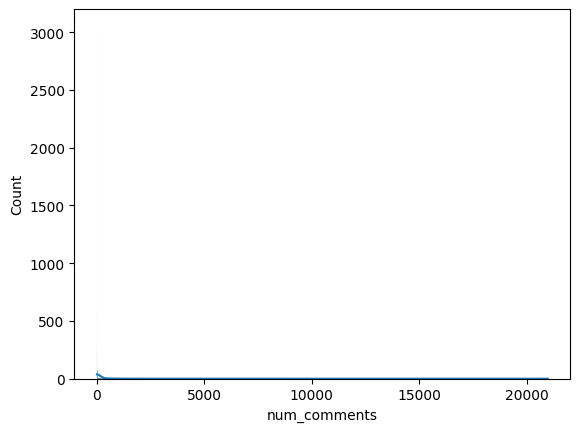

In [53]:
sns.histplot(x="num_comments", data=df, kde=True)

In [54]:
X = df[["num_reactions",	"num_comments",	"num_shares",	"num_likes"]].iloc[:,].values
X

array([[529, 512, 262, 432],
       [150,   0,   0, 150],
       [227, 236,  57, 204],
       ...,
       [  2,   0,   0,   1],
       [351,  12,  22, 349],
       [ 17,   0,   0,  17]], shape=(7050, 4))

#### Elbow Method

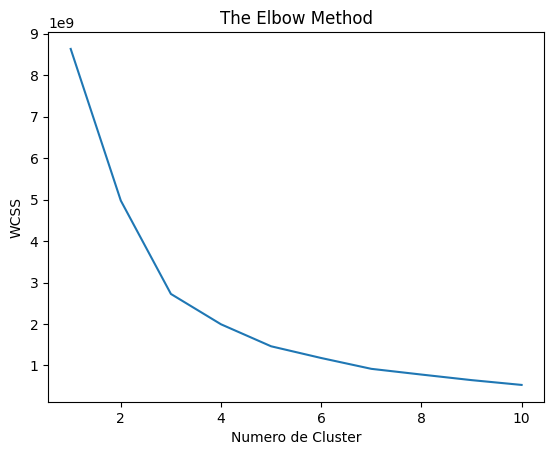

In [55]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init="k-means++", random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1,11), wcss)
plt.title("The Elbow Method")
plt.xlabel("Numero de Cluster")
plt.ylabel("WCSS")
plt.show()

In [56]:
kmeans = KMeans(n_clusters=3, init="k-means++", random_state=42)
y_kmeans = kmeans.fit_predict(X)
y_kmeans

array([0, 0, 0, ..., 0, 0, 0], shape=(7050,), dtype=int32)

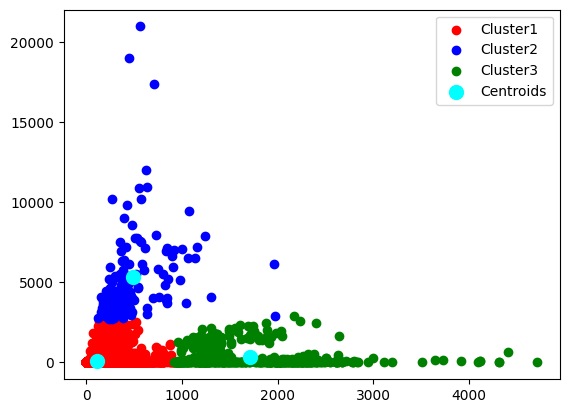

In [57]:
plt.scatter(X[y_kmeans == 0,0], X[y_kmeans == 0,1], c="red", label="Cluster1")
plt.scatter(X[y_kmeans == 1,0], X[y_kmeans == 1,1], c="blue", label="Cluster2")
plt.scatter(X[y_kmeans == 2,0], X[y_kmeans == 2,1], c="green", label="Cluster3")
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c="cyan",label="Centroids")
plt.legend()

# DBSCAN

In [61]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[["num_reactions",	"num_comments",	"num_shares",	"num_likes"]].iloc[:,].values)

In [62]:
dbscan = DBSCAN(eps=0.9, min_samples=5)
y_dbscan = dbscan.fit_predict(X_scaled)

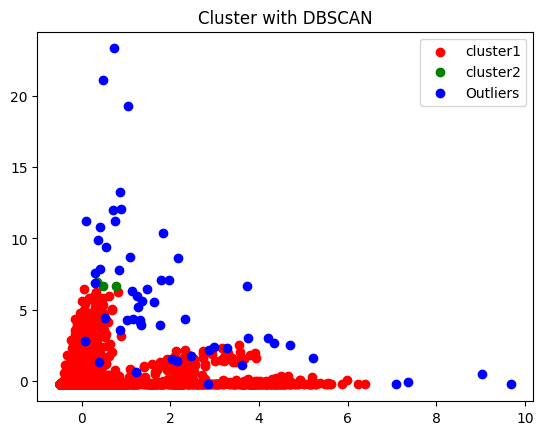

In [63]:
plt.scatter(X_scaled[y_dbscan == 0,0],X_scaled[y_dbscan == 0,1], c="red", label="cluster1")
plt.scatter(X_scaled[y_dbscan == 1,0],X_scaled[y_dbscan == 1,1], c="green", label="cluster2")
plt.scatter(X_scaled[y_dbscan == -1,0],X_scaled[y_dbscan == -1,1], c="blue", label="Outliers")
plt.title("Cluster with DBSCAN")
plt.legend()
plt.show()